# 1. Imports

In [15]:
import pandas as pd
import os
import missingno as msno
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python')
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# 2. Data Processing

In [16]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, encoding = 'ISO-8859-1', sep='::', names=cols, engine='python')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [18]:
# rating 컬럼의 이름을 count로 바꿉니다.
ratings.rename(columns={'rating':'count'}, inplace=True)

In [19]:
ratings['count']


0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: count, Length: 836478, dtype: int64

In [20]:
ratings

,user_id,movie_id,count,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


### ㄴ 영화 제목이 movie_id로 분류되어있어 데이터 가시성이 낮으므로 title칼럼을 추가해준다.

In [21]:
ratings = pd.merge(ratings, movies, on=['movie_id']) #merge(원하는 열을 넣을 데이터, 참조할 데이터, on = 참조할 열)
ratings

,user_id,movie_id,count,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
836473,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
836474,5854,3026,4,958346883,Slaughterhouse (1987),Horror
836475,5854,690,3,957744257,"Promise, The (Versprechen, Das) (1994)",Romance
836476,5938,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


### ㄴ merge함수를 이용하여 ratings파일의 movie_id에 맞춰 title과 genre를 병합시켜준다

## 1) Ratings에 있는 Unique한 영화 개수

In [22]:
ratings['movie_id'].nunique()

3628

## 2) rating에 있는 유니크한 사용자 수 

In [23]:
ratings['user_id'].nunique()

6039

## 3) 가장 인기 있는 영화 30개(인기순) 

In [24]:
ratings_count = ratings.groupby('title')['user_id'].count()
ratings_count.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

## 불필요한 칼럼 제거

In [25]:
x = ratings['movie_id']
z = ratings['genre']
y = ratings['timestamp']
del ratings['timestamp']
del ratings['movie_id']
del ratings['genre']
ratings = pd.DataFrame(ratings, columns = ['user_id', 'title', 'count'])
ratings

,user_id,title,count
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,2,One Flew Over the Cuckoo's Nest (1975),5
2,12,One Flew Over the Cuckoo's Nest (1975),4
3,15,One Flew Over the Cuckoo's Nest (1975),4
4,17,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
836473,5851,One Little Indian (1973),5
836474,5854,Slaughterhouse (1987),4
836475,5854,"Promise, The (Versprechen, Das) (1994)",3
836476,5938,"Five Wives, Three Secretaries and Me (1998)",4


### ㄴ movie_id, genre, timestamp칼럼은 불필요할것같아 지워줬다.

In [51]:
ratings['title']

0       0
1       0
2       0
3       0
4       0
     ... 
0     160
1     330
2    3562
3    2092
4    1339
Name: title, Length: 836483, dtype: int64

## 결측치 확인

<AxesSubplot:>

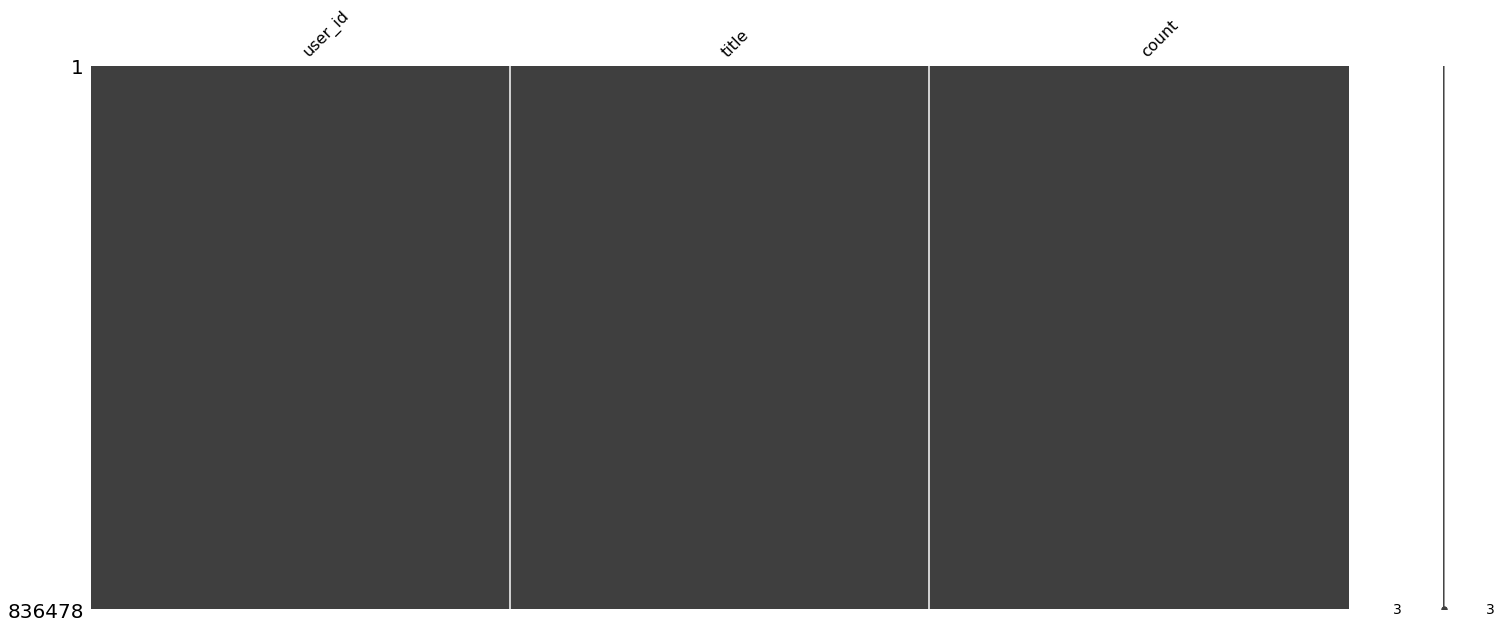

In [26]:
msno.matrix(ratings)

### ㄴ 데이터 병합 이후, 결측치가 없는것을 확인했다.

# 4. 선호 영화 추가하기

### * 별점을 시청 횟수로 해석

In [27]:
my_favorite = ['Forrest Gump (1994)', 'Lion King, The (1994)', 'Death in Brunswick (1991)', 'Lost Horizon (1937)', 'Scarlet Letter, The (1926)' ]
my_playlist = pd.DataFrame({'user_id':['mapark']*5, 'title':my_favorite,'count':[30]*5})

if not ratings.isin({'user_id':['mapark']})['user_id'].any():
    ratings = ratings.append(my_playlist)
    
ratings.tail()

,user_id,title,count
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30
4,mapark,"Scarlet Letter, The (1926)",30


In [28]:
my_playlist

,user_id,title,count
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30
4,mapark,"Scarlet Letter, The (1926)",30


In [29]:
ratings

,user_id,title,count
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,2,One Flew Over the Cuckoo's Nest (1975),5
2,12,One Flew Over the Cuckoo's Nest (1975),4
3,15,One Flew Over the Cuckoo's Nest (1975),4
4,17,One Flew Over the Cuckoo's Nest (1975),5
...,...,...,...
0,mapark,Forrest Gump (1994),30
1,mapark,"Lion King, The (1994)",30
2,mapark,Death in Brunswick (1991),30
3,mapark,Lost Horizon (1937),30


# 5. Indexing

In [30]:
user_unique = ratings['user_id'].unique()
title_unique = ratings['title'].unique()


user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}

In [31]:
print(user_to_idx['mapark'])    
print(title_to_idx['Scarlet Letter, The (1926)'])

6039
1339


In [32]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.
 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_title_data = ratings['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(ratings):
    print('title column indexing OK!!')
    ratings['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

ratings

user_id column indexing OK!!
title column indexing OK!!


,user_id,title,count
0,0,0,5
1,1,0,5
2,2,0,4
3,3,0,4
4,4,0,5
...,...,...,...
0,6039,160,30
1,6039,330,30
2,6039,3562,30
3,6039,2092,30


In [34]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = ratings[ratings['count']<2]
one, all_data = len(only_one), len(ratings)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

0,836483
Ratio of only_one over all data is 0.00%


# 6. CSR Matrix

In [44]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_title = ratings['title'].nunique()

csr_data = csr_matrix((ratings['count'], (ratings.user_id, ratings.title)), shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

# 7. MF Model

## 1) als model

In [45]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [46]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [47]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [48]:
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

## 높은 선호도 영화와의 내적관계 구하기

In [60]:
mapark, gump = user_to_idx['mapark'], title_to_idx['Forrest Gump (1994)']
mapark_vector, gump_vector = als_model.user_factors[mapark], als_model.item_factors[gump]

print('슝=3')

슝=3


In [61]:
mapark_vector

array([-0.6598086 ,  0.12824985, -0.02122569,  2.0470207 ,  1.0334886 ,
       -0.45917872,  0.07441131,  1.2703582 ,  0.87561226, -0.9349868 ,
        0.4299957 ,  0.6891734 ,  0.10025988,  1.1201316 ,  1.1195703 ,
       -2.1209776 ,  1.8803984 , -0.3748745 , -2.773686  , -0.22589268,
        0.785048  , -1.1173439 ,  0.27808887, -0.46765888, -0.3476882 ,
        1.310319  , -0.721694  , -0.24132118,  0.9826145 ,  1.917788  ,
        1.1897427 ,  0.2970051 , -2.1993759 ,  1.3819805 , -1.1204206 ,
       -1.9578904 , -0.577297  ,  1.0636336 , -0.5014559 , -0.4806568 ,
        0.10880001, -0.80684507, -0.04181737, -1.0812011 , -0.49697986,
       -0.08253948,  1.0058457 , -1.6601938 ,  0.28465614, -1.7263787 ,
       -0.08365929, -1.8720868 , -1.5444506 ,  0.4666411 ,  0.56093407,
       -0.29207867, -0.40218288,  1.8867698 ,  0.09099066,  1.3774942 ,
        0.9048713 ,  0.37884718, -1.4279476 ,  0.37735307, -0.37542576,
       -1.0227971 , -1.2262449 ,  1.1818793 , -1.0327448 , -0.27

In [62]:
gump_vector

array([ 0.02800233, -0.01711432, -0.03084885,  0.02275697,  0.04925659,
        0.01830143,  0.00403875, -0.00024346,  0.03230691,  0.02084976,
        0.02351384,  0.01511372, -0.00942343,  0.03130496,  0.00848911,
       -0.0181265 ,  0.0165545 ,  0.01081937,  0.02464812,  0.01983786,
       -0.01169148, -0.02792377, -0.0001004 ,  0.01300118,  0.02373006,
        0.06889316, -0.01728596,  0.02486021,  0.00185719,  0.05492679,
        0.00892902,  0.02282126, -0.01800615,  0.01446471, -0.01847221,
       -0.01315994,  0.000313  , -0.00678248,  0.01457221,  0.00210271,
       -0.01574515, -0.00116272, -0.01830233,  0.01115936, -0.02433864,
        0.03694955,  0.0189379 , -0.02694328, -0.00927369, -0.02030967,
        0.0140215 , -0.02040237, -0.0259016 ,  0.03381275,  0.00083073,
        0.01461171,  0.03612526,  0.01694442, -0.03307101, -0.01034682,
        0.01798074,  0.00091571,  0.00365524,  0.02320257, -0.01674007,
       -0.01175275, -0.00515685,  0.01984206,  0.03853659, -0.00

In [63]:
np.dot(mapark_vector, gump_vector)

0.9660247

### ㄴ 5가지 선호 영화중 하나인 영화라 그런지 1에 근접하는 수치가 나왔다.

## 선호도 관계 없는 영화와 내적 관계 구하기

In [64]:
mapark, indian = user_to_idx['mapark'], title_to_idx['One Little Indian (1973)']
mapark_vector, indian_vector = als_model.user_factors[mapark], als_model.item_factors[indian]

print('슝=3')

슝=3


In [65]:
mapark_vector

array([-0.6598086 ,  0.12824985, -0.02122569,  2.0470207 ,  1.0334886 ,
       -0.45917872,  0.07441131,  1.2703582 ,  0.87561226, -0.9349868 ,
        0.4299957 ,  0.6891734 ,  0.10025988,  1.1201316 ,  1.1195703 ,
       -2.1209776 ,  1.8803984 , -0.3748745 , -2.773686  , -0.22589268,
        0.785048  , -1.1173439 ,  0.27808887, -0.46765888, -0.3476882 ,
        1.310319  , -0.721694  , -0.24132118,  0.9826145 ,  1.917788  ,
        1.1897427 ,  0.2970051 , -2.1993759 ,  1.3819805 , -1.1204206 ,
       -1.9578904 , -0.577297  ,  1.0636336 , -0.5014559 , -0.4806568 ,
        0.10880001, -0.80684507, -0.04181737, -1.0812011 , -0.49697986,
       -0.08253948,  1.0058457 , -1.6601938 ,  0.28465614, -1.7263787 ,
       -0.08365929, -1.8720868 , -1.5444506 ,  0.4666411 ,  0.56093407,
       -0.29207867, -0.40218288,  1.8867698 ,  0.09099066,  1.3774942 ,
        0.9048713 ,  0.37884718, -1.4279476 ,  0.37735307, -0.37542576,
       -1.0227971 , -1.2262449 ,  1.1818793 , -1.0327448 , -0.27

In [66]:
indian_vector

array([ 4.92825347e-04, -5.14702057e-04,  9.37301491e-04, -4.89231665e-04,
        1.57386495e-03, -5.89961943e-04,  7.95459666e-04,  5.75897284e-04,
        1.59778574e-05, -7.59585164e-05,  1.33720270e-04,  7.17657793e-04,
        1.49709499e-03,  4.94875247e-04, -4.55719855e-04, -4.85930650e-05,
        4.98882728e-04,  3.02198285e-04,  4.49522980e-04,  2.79081753e-04,
        3.65992280e-04, -3.75470700e-04,  2.57455301e-03, -1.88691192e-05,
        1.16601039e-03,  5.49939887e-06,  6.67778659e-04,  6.61265687e-04,
       -1.53525267e-04,  6.10403193e-04,  5.36743260e-04,  4.79653274e-04,
        2.01960886e-03, -2.51996069e-04, -7.29478488e-04, -4.43709432e-04,
        1.79997805e-04,  1.25694706e-03,  5.47219359e-04,  1.04236265e-03,
       -2.29583340e-04,  6.88753964e-04,  7.27845938e-04,  1.25672168e-03,
       -5.43596805e-04, -3.71408765e-04,  1.39529421e-03,  9.59884666e-04,
        6.50293601e-04,  9.68610984e-05,  1.59415606e-04, -4.65705583e-04,
        5.31176629e-04,  

In [67]:
np.dot(mapark_vector, indian_vector)

0.0076771006

### ㄴ 매우 낮은 수치로 나의 추천 목록엔 전혀 출현하지 않을 영화일것이다.

# 8. 비슷한 영화 찾기

In [69]:
favorite_title = 'Forrest Gump (1994)'
title_id = title_to_idx[favorite_title]
similar_title = als_model.similar_items(title_id, N=15)
similar_title

[(160, 0.99999994),
 (110, 0.5999108),
 (336, 0.4838187),
 (204, 0.461291),
 (3562, 0.45990035),
 (613, 0.44588822),
 (20, 0.44335487),
 (1234, 0.4345885),
 (666, 0.4123218),
 (508, 0.39778116),
 (154, 0.392517),
 (466, 0.39146796),
 (3543, 0.38810766),
 (23, 0.3854228),
 (340, 0.38425338)]

## title_id를 영화이름으로 mapping

In [71]:
idx_to_title = {v:k for k,v in title_to_idx.items()}
[idx_to_title[i[0]] for i in similar_title]

['Forrest Gump (1994)',
 'Groundhog Day (1993)',
 'Pretty Woman (1990)',
 'Clueless (1995)',
 'Death in Brunswick (1991)',
 'Four Weddings and a Funeral (1994)',
 'Pleasantville (1998)',
 'Dave (1993)',
 'Sleepless in Seattle (1993)',
 'Ghost (1990)',
 'As Good As It Gets (1997)',
 'Wedding Singer, The (1998)',
 'Small Wonders (1996)',
 "Schindler's List (1993)",
 "My Best Friend's Wedding (1997)"]

## 추천 함수 만들기

In [78]:
def get_similar_title(title_name: str):
    title_id = title_to_idx[title_name]
    similar_title = als_model.similar_items(title_id)
    similar_title = [idx_to_title[i[0]] for i in similar_title]
    return similar_title

print("슝=3")

슝=3


In [81]:
get_similar_title('Scarlet Letter, The (1926)')

['Scarlet Letter, The (1926)',
 'Death in Brunswick (1991)',
 'Man from Down Under, The (1943)',
 'Incognito (1997)',
 'Coming Apart (1969)',
 'Loaded (1994)',
 'Bells, The (1926)',
 '24 7: Twenty Four Seven (1997)',
 'Shopping (1994)',
 'Macao (1952)']

### ㄴ 주홍글씨와 관계도가 높은 영화 목록들이 추천되었다.

# 9. 유저에게 영화 추천하기

In [83]:
user = user_to_idx['mapark']
# recommend에서는 user*item CSR Matrix를 받습니다.
title_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
title_recommended

[(50, 0.75980675),
 (40, 0.7016969),
 (33, 0.52397907),
 (4, 0.49483746),
 (10, 0.45918745),
 (38, 0.37579262),
 (458, 0.3715486),
 (20, 0.35884804),
 (391, 0.35854748),
 (1283, 0.34035975),
 (663, 0.30784187),
 (826, 0.30756676),
 (1389, 0.3074959),
 (475, 0.30477086),
 (529, 0.30331588),
 (1509, 0.30218747),
 (424, 0.3008504),
 (60, 0.29669756),
 (149, 0.29662102),
 (110, 0.291234)]

In [85]:
[idx_to_title[i[0]] for i in title_recommended]

['Toy Story 2 (1999)',
 'Toy Story (1995)',
 'Aladdin (1992)',
 "Bug's Life, A (1998)",
 'Beauty and the Beast (1991)',
 'Sixth Sense, The (1999)',
 'Mask, The (1994)',
 'Pleasantville (1998)',
 'Cider House Rules, The (1999)',
 'Inherit the Wind (1960)',
 "Singin' in the Rain (1952)",
 'Game, The (1997)',
 'East of Eden (1955)',
 'My Cousin Vinny (1992)',
 'Good Earth, The (1937)',
 'English Patient, The (1996)',
 'Misérables, Les (1995)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Grapes of Wrath, The (1940)',
 'Groundhog Day (1993)']

### ㄴ 실제로 내가 좋아하는 영화들이 추천되어 신기하다.

## 1) 기여도 살펴보기

### 목록을 봐도 젤 상위목록에 있는 추천 영화들이 디즈니계열 애니메이션들이다. 어떠한 영화가 이러한 추천목록 구성에 기여를 했는지 살펴보려 한다.

In [86]:
aladdin = title_to_idx['Aladdin (1992)']
explain = als_model.explain(user, csr_data, itemid=aladdin)

In [88]:
[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('Lion King, The (1994)', 0.593381089197238),
 ('Forrest Gump (1994)', 0.014168183540224734),
 ('Scarlet Letter, The (1926)', -0.000940866015982538),
 ('Death in Brunswick (1991)', -0.005355827343424359),
 ('Lost Horizon (1937)', -0.08892445122162482)]

### ㄴ 선호영화중 라이온킹이 있어 디즈니 계열 애니메이션을 추천한것으로 보인다.

---

# 회고

## 1. 굉장히 흥미로운 노드였다. 추천 시스템의 원리부터 진행 과정까지 설명히 세세하게 되어있어 이해하기가 수월했다.

## 2. 프로젝트 진행 전 데이터 전처리를 어느정도 제공해주었었지만, 추가적인 전처리가 필요했다. 해커톤을 진행하며 데이터 전처리에대한 공부가 더 필요하다 느꼈는데, 이 노드를 진행하며 직접 해볼 수 잇는 기회가 있어 좋았다.

## 3. ratings 데이터에 원하는 칼럼을 id에 맞게 가져오기위해 merge()함수를 이용하였다. 엑셀에서 작업하면 금방 끝나는 작업이지만 파이썬으로 하려하니 꽤 골머리를 앓아야했다.

## 4. 마지막에 실제로 내가 좋아하는 영화들이 추천되는 것을 보고 신기했었다. 여기서 끝난게 아니라 저런 목록들이 추천된 이유도 수치를 통해 알 수 있게 친절히 설명이 되어있어 좋았다.